In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

for dirname, _ , filenames in os.walk('./'):
    for file in filenames:
        print( os.path.join(dirname, file) )


./Bike.ipynb
./Bike1.ipynb
./test.csv
./train.csv
./.ipynb_checkpoints\Bike-checkpoint.ipynb
./.ipynb_checkpoints\Bike1-checkpoint.ipynb


In [2]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot:>

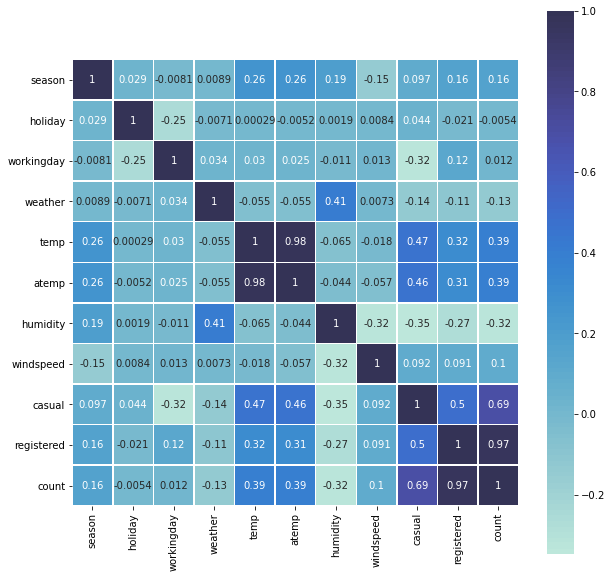

In [3]:
plt.figure(figsize = (10,10))
sns.heatmap( train.iloc[:,1:].corr(), lw = 0.5, annot = True, square = True, center = 1.4 )

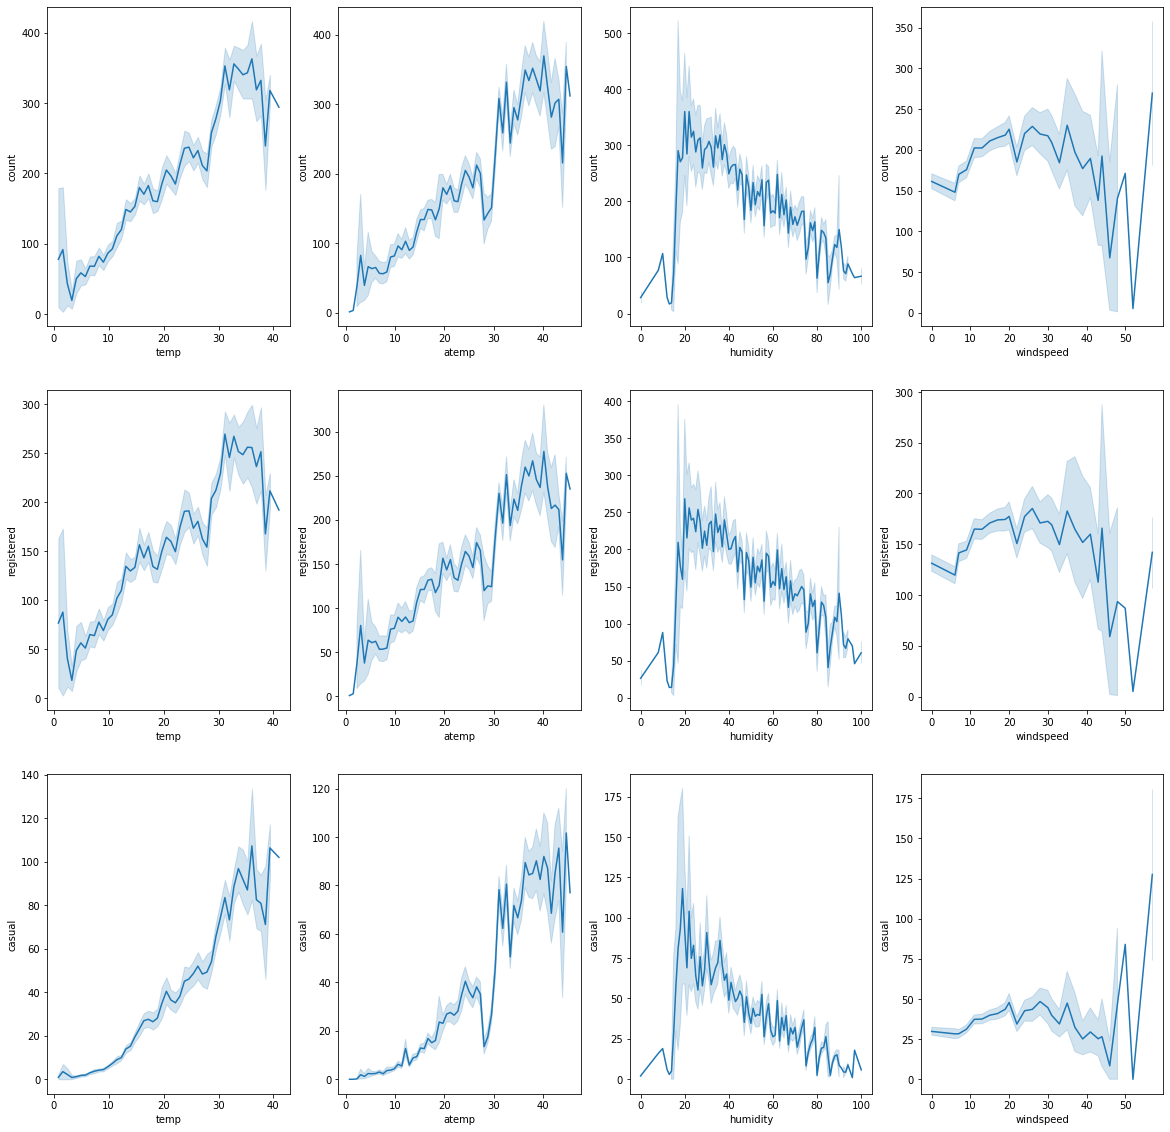

In [4]:
pre = ['count', 'registered', 'casual']
tt = [  'temp', 'atemp', 'humidity', 'windspeed' ] #剩下4個為離散型
fig, axes = plt.subplots( 3, 4, figsize = (20,20) )
count = 0
for i in pre:
    for j in tt:
        sns.lineplot( x = j, y = i, data = train, ax = axes[count//4][count%4] )
        count += 1

* 因為要預測的 casual 跟 windspeed 幾乎 0 相關所以將 windspeed 剔除
* 又 temp 跟 atemp 兩者正相關幾乎為 1 所以只須保留一個

In [5]:
train.drop('atemp', axis = 1)
test.drop('atemp', axis = 1)


,datetime,season,holiday,workingday,weather,temp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,56,11.0014
...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,56,8.9981


In [6]:
time = pd.to_datetime(train['datetime'])
train['year'] = time.dt.year
train['day'] = time.dt.day
train['month'] = time.dt.month
train['dayofweek'] = time.dt.dayofweek
train['hour'] = time.dt.hour

In [7]:
time = pd.to_datetime(train['datetime'])
test['year'] = time.dt.year
test['day'] = time.dt.day
test['month'] = time.dt.month
test['hour'] = time.dt.hour
test['dayofweek'] = time.dt.dayofweek

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
day             int64
month           int64
dayofweek       int64
hour            int64
dtype: object


<AxesSubplot:xlabel='hour', ylabel='casual'>

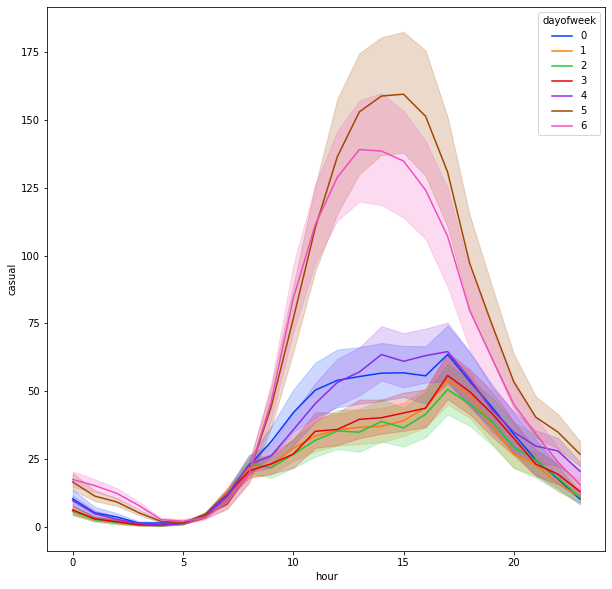

In [8]:
train.head()
train.tail()
print(train.dtypes)
train.isnull().sum()
plt.figure(figsize = (10,10))
sns.lineplot(x = 'hour', y = 'casual', hue = 'dayofweek', data = train, palette = sns.color_palette('bright', 7))

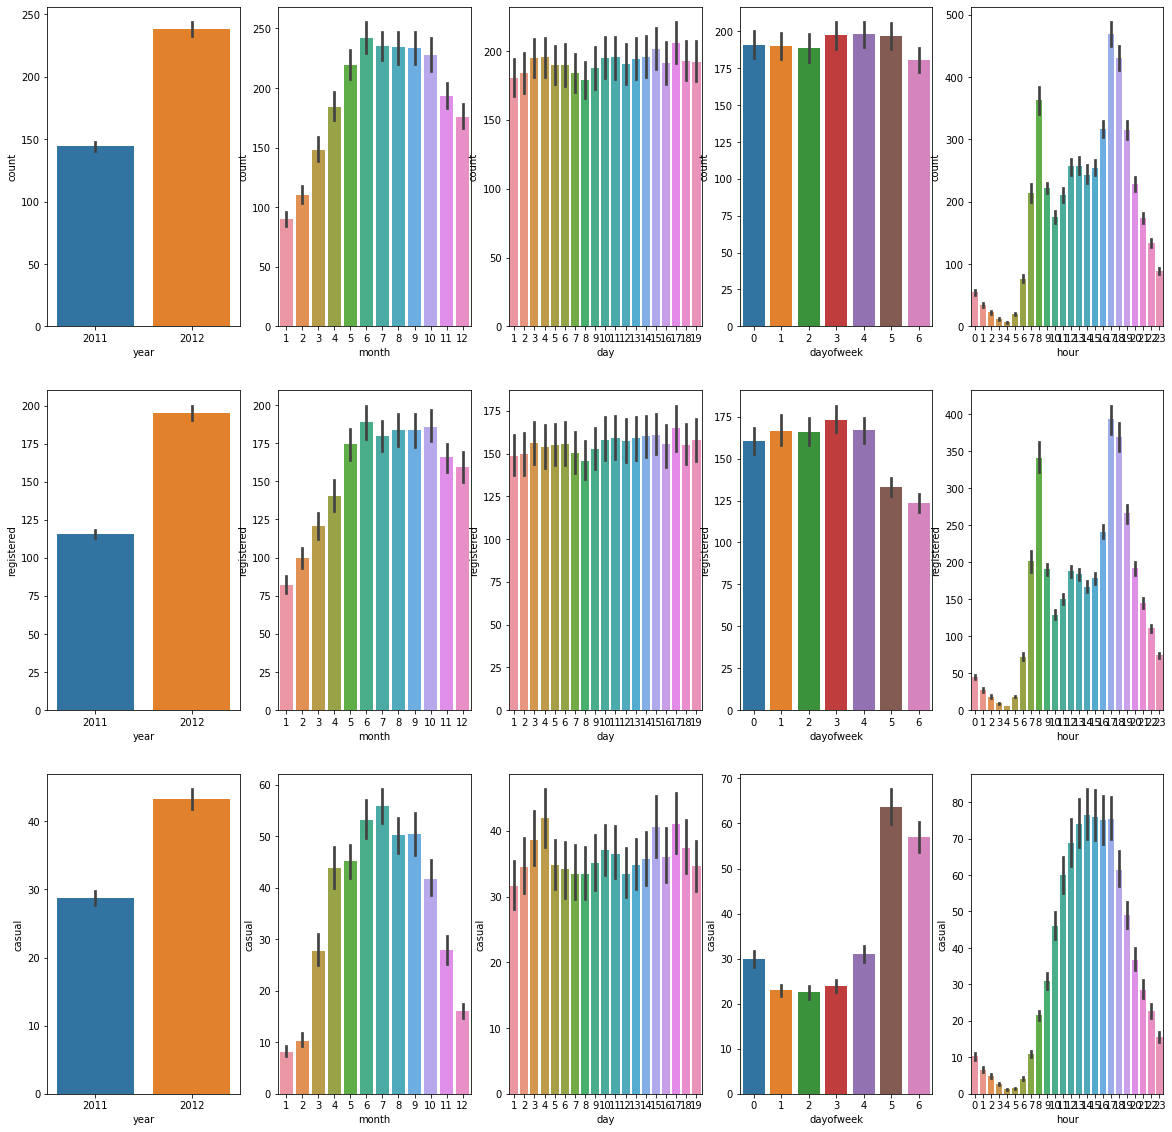

In [9]:
time = ['year', 'month', 'day', 'dayofweek', 'hour']
pre = ['count', 'registered', 'casual']
fig, axes = plt.subplots( 3, 5, figsize = (20,20) )
count = 0
for i in pre:
    for j in time:
        sns.barplot(x = j, y = i, data = train, ax = axes[count//5][count%5])
        count += 1
        

<AxesSubplot:>

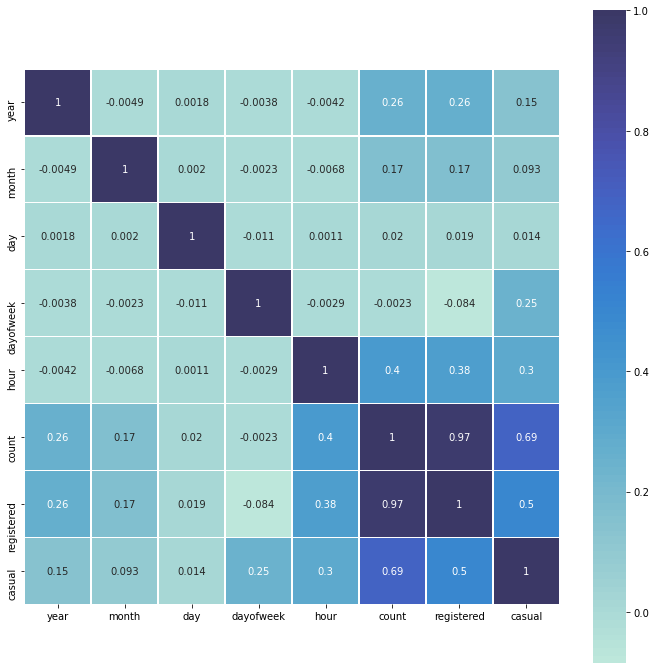

In [10]:
plt.figure(figsize = (12,12))
sns.heatmap(train[['year', 'month', 'day', 'dayofweek', 'hour','count', 'registered', 'casual']].corr(), lw = .5,
            center = 1.4, annot = True, square = True )

* 從上圖可知 hour 具有較大的相關係數, 都大於 0.3 所子在預測 count, registered, casual 都會採用
* 從 barplot 上可以觀察出 2012 比 2011 來得高, 雖然相關係數低但也採用
* month 在 barplot 上具有較大的變化, 雖然相關係數低但也採用
* day 的相關係數低, 且 barplot 的變化不大, 代表節日並無劇烈的影響
* dayofweek 在 casual 上具有較高的影響力, 所以只在 casual 上使用, 其它圖的 barplot 無明顯變化

## 總結: 刪除 atemp 以及 windspeed 屬性 並新增 hour, month, year 屬性
## 在 casual 預測上, 多新增 dayofweek 屬性

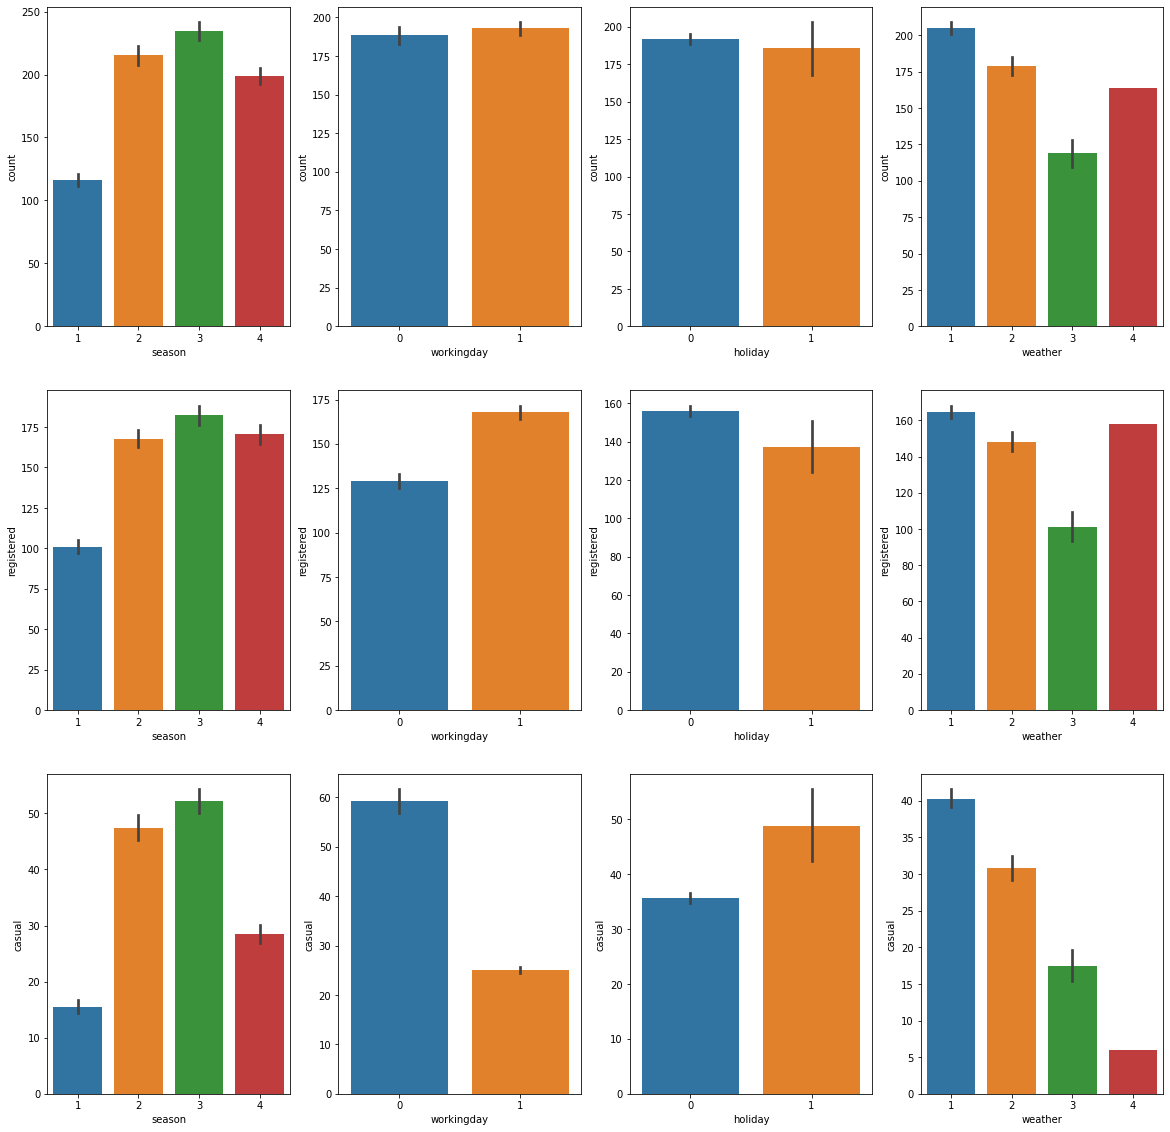

In [11]:
tt = ['season', 'workingday', 'holiday', 'weather']

fig, axes = plt.subplots(3,4, figsize = (20,20))
count = 0
for i in pre:
    for j in tt:
        sns.barplot(x = j, y = i, data = train, ax = axes[count//4][count%4] )
        count += 1


* workingday 跟 holiday 一起看, 可知在 count 上無明顯變化, 因此 count 上不使用
* season 及 weather 有較明顯變化, 因此選擇使用

In [12]:
# one-hot encoder
one_hot = ['season', 'weather', 'year', 'hour', 'month', 'dayofweek']
for w in one_hot:
    for i in train.groupby(w).count().index:
        a = []
        s = str(w) + str(i)
        for j in train[w]:
            if j == i:
                a.append(1)
            else:
                a.append(0)
        train[s] = a
# testing set
for w in one_hot:
    for i in test.groupby(w).count().index:
        a = []
        s = str(w) + str(i)
        for j in test[w]:
            if j == i:
                a.append(1)
            else:
                a.append(0)
        test[s] = a

In [13]:
train.columns
    

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'day', 'month', 'dayofweek', 'hour', 'season1', 'season2',
       'season3', 'season4', 'weather1', 'weather2', 'weather3', 'weather4',
       'year2011', 'year2012', 'hour0', 'hour1', 'hour2', 'hour3', 'hour4',
       'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11',
       'hour12', 'hour13', 'hour14', 'hour15', 'hour16', 'hour17', 'hour18',
       'hour19', 'hour20', 'hour21', 'hour22', 'hour23', 'month1', 'month2',
       'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9',
       'month10', 'month11', 'month12', 'dayofweek0', 'dayofweek1',
       'dayofweek2', 'dayofweek3', 'dayofweek4', 'dayofweek5', 'dayofweek6'],
      dtype='object')

In [14]:
print( test.columns )

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'day', 'month', 'hour',
       'dayofweek', 'season1', 'season2', 'season3', 'season4', 'weather1',
       'weather2', 'weather3', 'weather4', 'year2011', 'year2012', 'hour0',
       'hour1', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8',
       'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14', 'hour15',
       'hour16', 'hour17', 'hour18', 'hour19', 'hour20', 'hour21', 'hour22',
       'hour23', 'month1', 'month2', 'month3', 'month4', 'month5', 'month6',
       'month7', 'month8', 'month9', 'month10', 'month11', 'month12',
       'dayofweek0', 'dayofweek1', 'dayofweek2', 'dayofweek3', 'dayofweek4',
       'dayofweek5', 'dayofweek6'],
      dtype='object')


In [15]:
count_drop_col = ['datetime', 'season', 'weather', 'atemp', 'holiday', 'workingday', 'year', 'day', 'month', 'hour',
                  'windspeed', 'dayofweek','dayofweek0', 'dayofweek1','dayofweek2', 'dayofweek3', 'dayofweek4',
                  'dayofweek5', 'dayofweek6', 'casual', 'registered', 'count']
casual_drop_col = ['datetime', 'season', 'weather', 'atemp', 'year', 'day', 'month', 'hour', 'windspeed', 'dayofweek'
                  ,'casual', 'registered', 'count']
registered_drop_col = ['datetime', 'season', 'weather', 'atemp', 'year', 'day', 'month', 'hour', 'windspeed', 
                       'dayofweek','dayofweek0', 'dayofweek1', 'dayofweek2', 'dayofweek3', 'dayofweek4', 'dayofweek5',
                       'dayofweek6','casual', 'registered', 'count' ]

In [16]:
count_train = train.drop(count_drop_col, axis = 1)
casual_train = train.drop(casual_drop_col, axis = 1)
registered_train = train.drop(registered_drop_col, axis = 1)
Ycount = train['count']
Ycasual = train['casual']
Yregistered = train['registered']

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
Xcount_train, Xcount_test, Ycount_train, Ycount_test =  train_test_split( count_train, Ycount,
                                                                         test_size = 0.2, random_state = 40 )
Xcasual_train, Xcaual_test, Ycasual_train, Ycasual_test = train_test_split( casual_train, Ycasual, 
                                                                          test_size = 0.2, random_state = 40)
Xregistered_train, Xregistered_test, Yregistered_train, Yregistered_test = train_test_split( registered_train, Yregistered,
                                                                                        test_size = 0.2, random_state = 40)


In [26]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
xg = xgb.XGBRegressor()
xgb_parameters = {
    'max_depth' : [1,2,3,4,5,6],
    'eta' : [0.01, 0.03, 0.05],
    'alpha' : [0],
    'n_estimators' : [100, 500, 800, 1000, 1200, 1400]
}

rf_parameters = {
    'n_estimators' : [50, 100, 150, 200, 250 ],
    'min_impurity_decrease' : [0.0, 0.1, 0.001],
    'max_depth' : [20, 40, 60, 80, 100]
}

In [39]:
from sklearn.metrics import mean_squared_log_error, make_scorer
def custom_scorer( y_true, y_pred ):
    for i in range(len(y_pred)):
        if y_pred[i] < 0:
            y_pred[i] = 1
    return np.sqrt( meam_squared_log_error( y_true, y_pred ) )
scorer = make_scorer( custom_scorer, greater_is_better = False )


In [26]:
print(Xcount_train.shape)
print(Ycount_train.shape)
print(Xcount_test.shape)

(8708, 48)
(8708,)
(2178, 48)


In [43]:
from sklearn.linear_model import LinearRegression
predict = []
lreg = LinearRegression().fit(Xcount_train, Ycount_train)
lreg_pred = lreg.predict(Xcount_test)

rf_reg = GridSearchCV( rf, rf_parameters, cv = 5, verbose = 2, scoring = scorer, n_jobs = -1 )
rf_reg.fit(Xcount_train, Ycount_train)
rf_pred = rf_reg.predict(Xcount_test)

xg_reg = GridSearchCV( xg, xgb_parameters, cv = 5, verbose = 2, scoring = scorer, n_jobs = -1 )
xg_reg.fit(Xcount_train, Ycount_train)
xg_pred = xg_reg.predict(Xcount_test)

predict.append(lreg_pred)
predict.append(rf_pred)
predict.append(xg_pred)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 18.9min finished


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 30.6min finished


In [45]:
model = ['Linear Regrssion : ', 'Random Froest Regressor : ', 'XGBoost : ']
for i in range(len(predict)):
    pre = []
    for pred_label in predict[i]:
        if  pred_label < 0:
            pre.append(1)
        else:
            pre.append(pred_label)
    print(model[i] + str(np.sqrt(mean_squared_log_error(Ycount_test, pre))))

Linear Regrssion : 1.099188393088653
Random Froest Regressor : 0.6685291052639958
XGBoost : 0.7089522737892999


In [47]:
print(rf_reg.best_params_)
print(xg_reg.best_params_)

{'max_depth': 80, 'min_impurity_decrease': 0.1, 'n_estimators': 150}
{'alpha': 0, 'eta': 0.03, 'max_depth': 6, 'n_estimators': 500}


In [24]:
count_drop_col = ['datetime', 'season', 'weather', 'atemp', 'holiday', 'workingday', 'year', 'day', 'month', 'hour',
                  'windspeed', 'dayofweek','dayofweek0', 'dayofweek1','dayofweek2', 'dayofweek3', 'dayofweek4',
                  'dayofweek5', 'dayofweek6']
count_test = test.drop(count_drop_col, axis = 1)

In [28]:
count_test = test.drop(count_drop_col, axis = 1)
rf = RandomForestRegressor(max_depth = 80, min_impurity_decrease = 0.1, n_estimators = 150)
rf.fit(count_train, Ycount)
final_pred = rf.predict(count_test)


In [34]:
final_preds = []
for i in final_pred:
    if i < 1:
        final_preds.append(1)
    else:
        final_preds.append(i)
submission = pd.DataFrame( { 'datetime':test['datetime'], 'count': final_pred} )
submission = submission[['datetime', 'count']]
submission.to_csv('Bike.csv', index = False)

In [35]:
ff = pd.read_csv('Bike.csv')
ff.head()

,datetime,count
0,2011-01-20 00:00:00,21.923575
1,2011-01-20 01:00:00,13.411939
2,2011-01-20 02:00:00,10.527084
3,2011-01-20 03:00:00,9.288570
4,2011-01-20 04:00:00,5.430967
